In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("/content/Salary_dataset.csv", index_col=0)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [9]:
df.shape

(30, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


Let's see dependence between Salary and Experience of employes

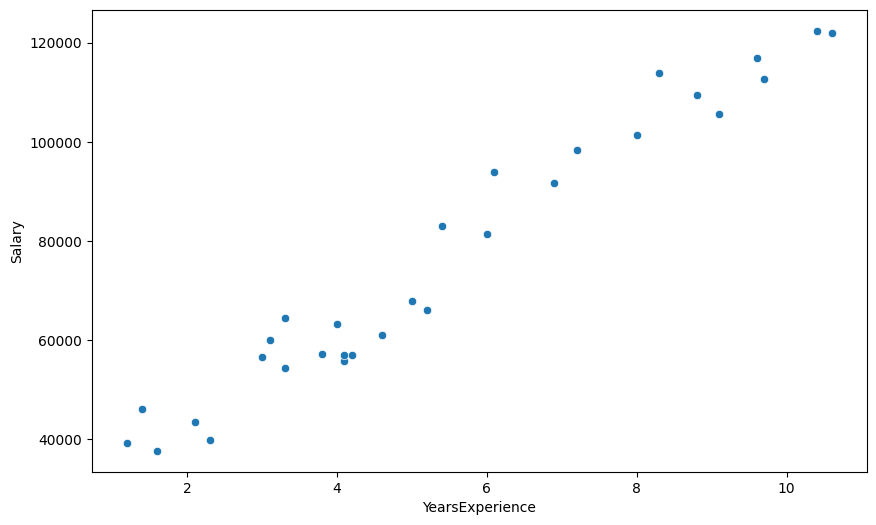

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='YearsExperience', y='Salary')
plt.show()

As you can see the correlation among Experience and Salary is high


In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.1, random_state=2)


In [13]:
X_train=np.asanyarray(train_set[['YearsExperience']])
Y_train=np.asanyarray(train_set[['Salary']])

In [14]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [15]:
LR.fit(X_train, Y_train)

LinearRegression()

In [16]:
X_test=np.asanyarray(test_set[['YearsExperience']])
Y_test=np.asanyarray(test_set[['Salary']])

In [17]:
Y_predict = LR.predict(X_test)

Now, we'll se accuracy of our LR model

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = np.sqrt(mean_squared_error(Y_test, Y_predict))
mae = mean_absolute_error(Y_test, Y_predict)

In [20]:
print("mse", mse)
print("mae", mae)

mse 7052.718899905328
mae 6759.367159215452


In [25]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [26]:
X_train_prediction = classifier.predict(X_train)

In [28]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(X_train_prediction, Y_train)
print("ACCURACY", acc*100,'%')

ACCURACY 92.5925925925926 %


Accuracy: 92.5%